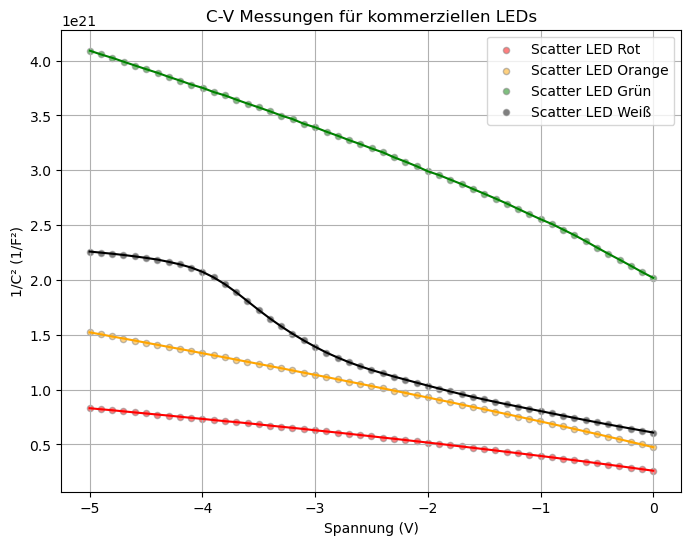

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

ordner_pfad = '/Users/naebaekhap/FP_Protokoll_Kim/FP_Messdaten/F13/Messdaten/3.Aufgabe'

dateien = [f for f in os.listdir(ordner_pfad) if f.endswith('.csv')]

plt.figure(figsize=(8, 6))  # Erstelle eine Figure für die Plots

# Zuordnung von Dateinamen zu Farben
info = {
    'CV_rot.csv': {'farbe': 'red', 'label': 'LED Rot'},
    'CV_orange.csv': {'farbe': 'orange', 'label': 'LED Orange'},
    'CV_gruen.csv': {'farbe': 'green', 'label': 'LED Grün'},   
    'CV_weiss.csv': {'farbe': 'black', 'label': 'LED Weiß'}
}

for datei in dateien:
    # Vollständiger Pfad zur Datei
    voller_pfad = os.path.join(ordner_pfad, datei)
    
    # Lese die CSV-Datei, überspringe die ersten zwei Zeilen und setze den Delimiter auf Tab
    daten = pd.read_csv(voller_pfad, delimiter='\t', skiprows=2, header=None)
    
    # Spaltennamen manuell
    daten.columns = ['Frequency', 'Capacitance', 'Resistance', 'VAC', 'IAC', 'VDC', 'IDC', 'Time', 'Impedance', 'Temperature']
    
    # Berechne 1/C^2 
    daten['1/C^2'] = 1 / daten['Capacitance']**2

    farbe = info[datei]['farbe']
    label = info[datei]['label']
    
    # 라인
    plt.plot(daten['VDC'], daten['1/C^2'], color=farbe)
    
    # 점점이 알파 값으로 투명도
    plt.scatter(daten['VDC'], daten['1/C^2'], color=farbe, edgecolor='grey', alpha=0.5, s=20, label=f'Scatter {label}')




plt.title('C-V Messungen für kommerziellen LEDs')
plt.xlabel('Spannung (V)')
plt.ylabel('1/C² (1/F²)')
plt.legend()
plt.grid(True)
plt.show()